# Day 2 
[![Author - DanRamirez](https://img.shields.io/badge/Author-DanRamirez-2ea44f?style=for-the-badge)](https://github.com/Dandata0101)
![Python - Version](https://img.shields.io/badge/PYTHON-3.11-red?style=for-the-badge&logo=python&logoColor=white)
[![Project Repo](https://img.shields.io/badge/Our_Project_Repo-Visit-blue?style=for-the-badge&logo=github&logoColor=white)](https://github.com/Dandata0101/mbs-fraud-detection)



##  flattening file sizes

In [ ]:
# select at least 3 variables for this analysis

import os
import sys
from scripts.csvtopaquet import csv_to_parquet_single_file

current_directory = os.getcwd()
csv1_file_path = os.path.join(current_directory, '01-data', 'FD_02_apl_test.csv')
csv2_file_path = os.path.join(current_directory, '01-data', 'FD_02_apl_train.csv')
csv3_file_path = os.path.join(current_directory, '01-data', 'FD_02_previos_appl.csv')
csv4_file_path = os.path.join(current_directory, '01-data', 'FD_05_fraud_small_datset.csv')

output_file_path1 = os.path.join(current_directory, '01-data', 'FD_02_apl_test.parquet')
output_file_path2 = os.path.join(current_directory, '01-data', 'FD_02_apl_train.parquet')
output_file_path3 = os.path.join(current_directory, '01-data', 'FD_02_previos_appl.parquet')
output_file_path4 = os.path.join(current_directory, '01-data', 'FD_05_fraud_small_datset.parquet')


csv_to_parquet_single_file(csv_file_path=csv1_file_path, output_file_path=output_file_path1, chunksize=100000, sample_rows=None, drop_columns=None)
csv_to_parquet_single_file(csv_file_path=csv2_file_path, output_file_path=output_file_path2, chunksize=100000, sample_rows=None, drop_columns=None)
csv_to_parquet_single_file(csv_file_path=csv3_file_path, output_file_path=output_file_path3, chunksize=100000, sample_rows=None, drop_columns=None)
csv_to_parquet_single_file(csv_file_path=csv4_file_path, output_file_path=output_file_path4, chunksize=100000, sample_rows=None, drop_columns=None)

In [ ]:
import pandas as pd
import numpy as np
import sys,os

current_directory = os.getcwd()
parquetFile1 = os.path.join(current_directory, '01-data', 'FD_02_apl_test.parquet')
parquetFile2 = os.path.join(current_directory, '01-data', 'FD_02_apl_train.parquet')
parquetFile3 = os.path.join(current_directory, '01-data', 'FD_02_previos_appl.parquet')

df1 = pd.read_parquet(parquetFile1)
df2 = pd.read_parquet(parquetFile2)
df3 = pd.read_parquet(parquetFile3)


Basic data inspection
   SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_19 FLAG_DOCUMENT_20

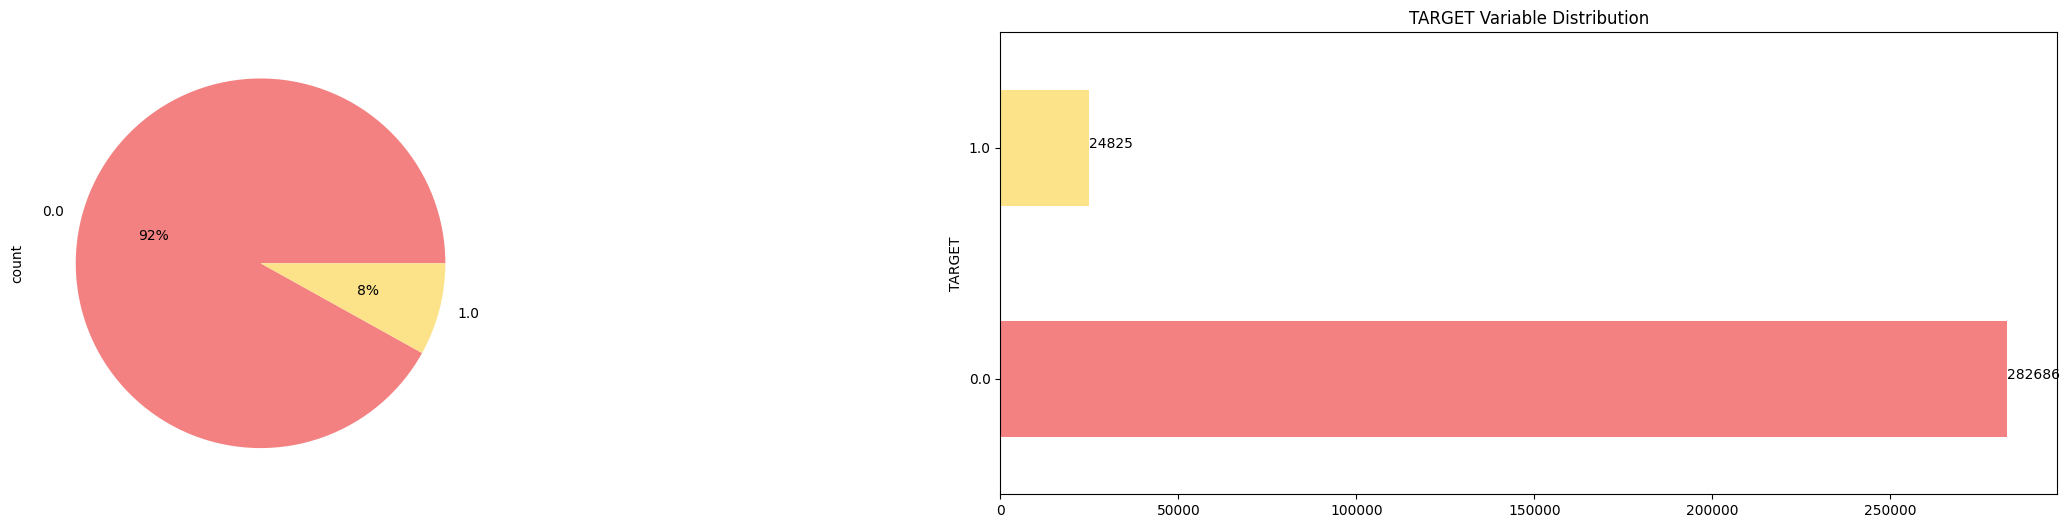

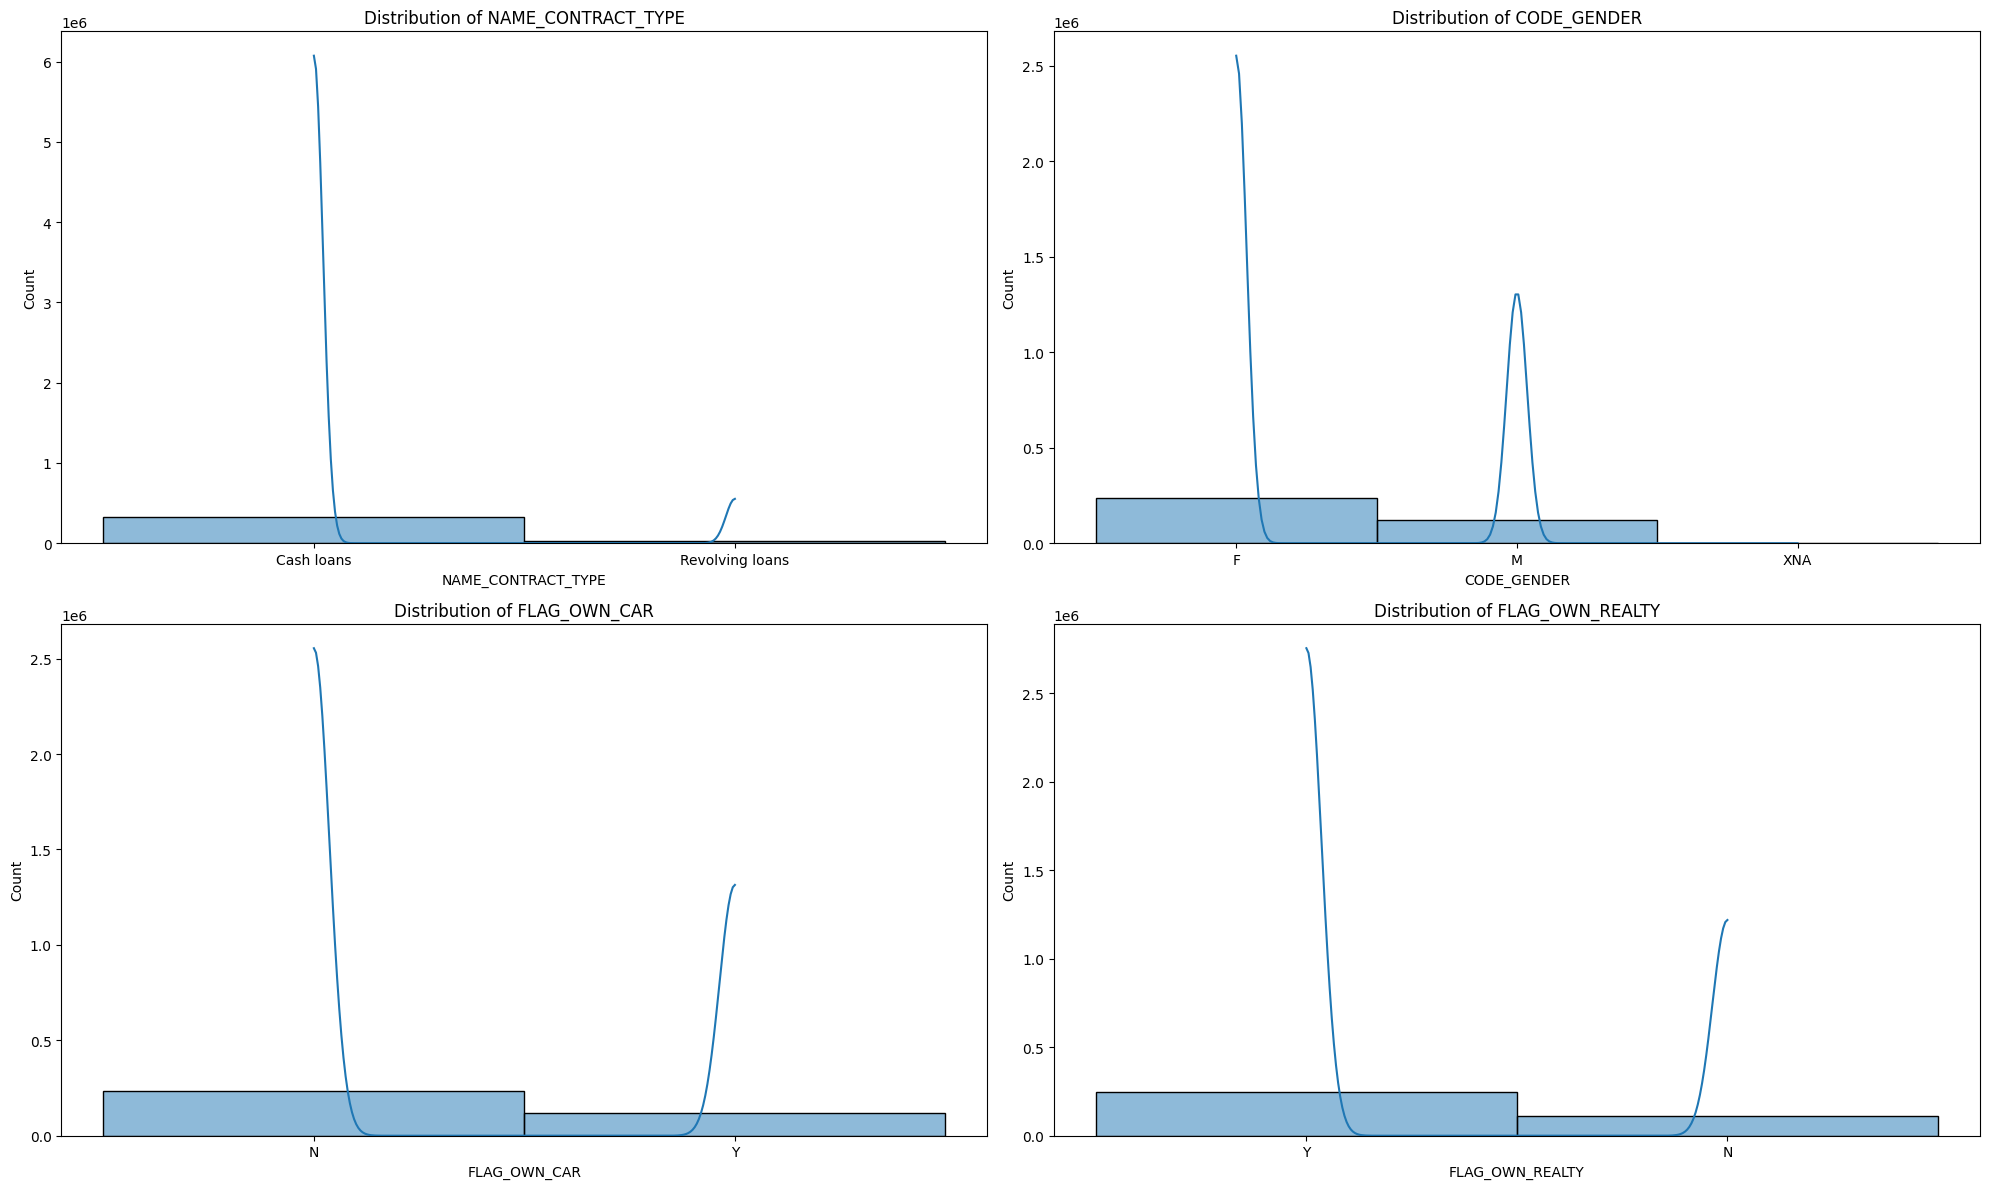

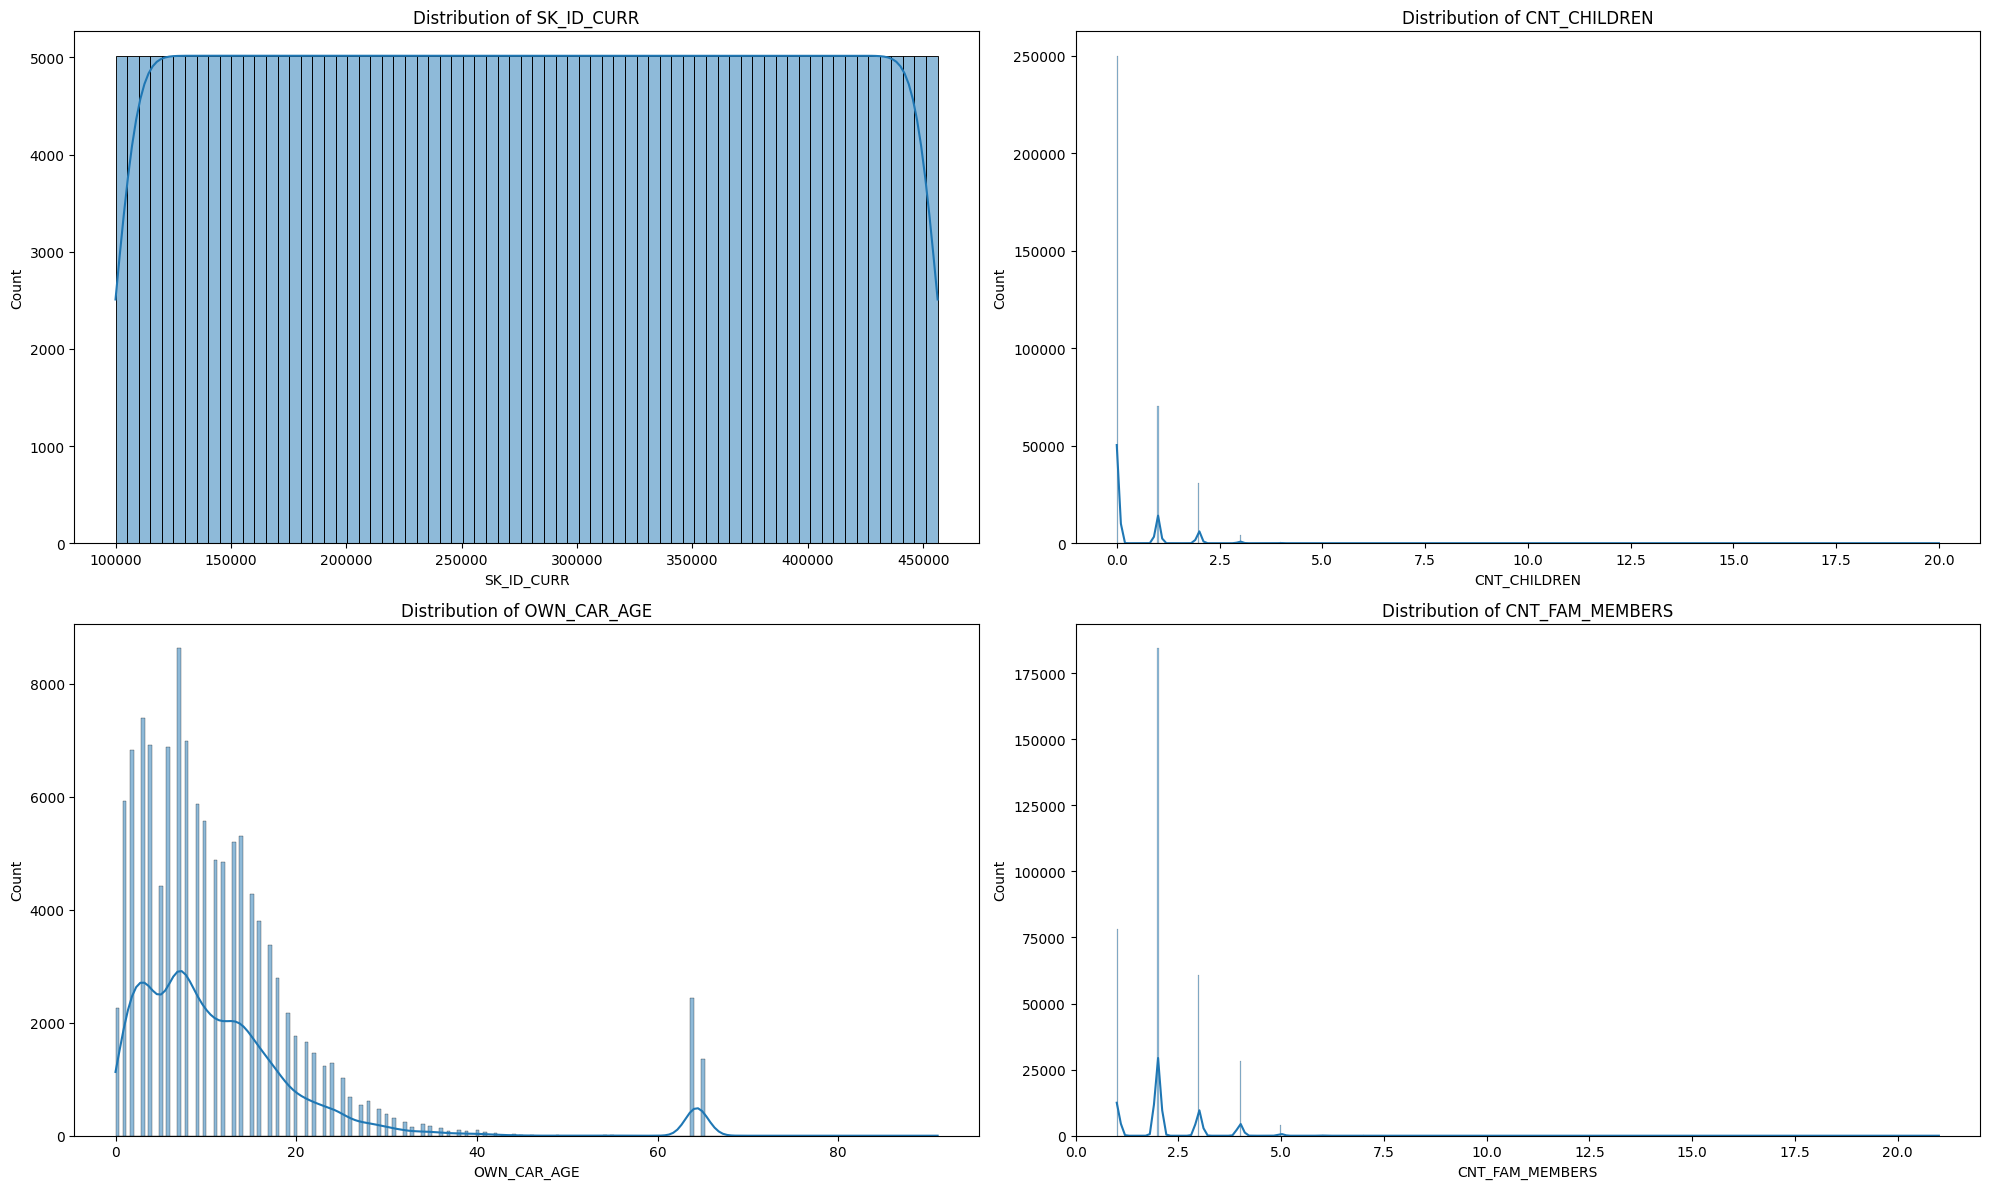

            SK_ID_PREV NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
SK_ID_CURR                                                                
0              2030495     Consumer loans     1730.430          17145.0   
0              2030495     Consumer loans     1730.430          17145.0   
1              2802425         Cash loans    25188.615         607500.0   
1              2802425         Cash loans    25188.615         607500.0   
2              2523466         Cash loans    15060.735         112500.0   

            AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
SK_ID_CURR                                                  
0              17145.0               0.0          17145.0   
0              17145.0               0.0          17145.0   
1             679671.0               NaN         607500.0   
1             679671.0               NaN         607500.0   
2             136444.5               NaN         112500.0   

           WEEKDAY_APPR_PROCESS_START  HOUR_AP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np

current_directory = os.getcwd()
parquetFile1 = os.path.join(current_directory, '01-data', 'FD_02_apl_test.parquet')
parquetFile2 = os.path.join(current_directory, '01-data', 'FD_02_apl_train.parquet')
parquetFile3 = os.path.join(current_directory, '01-data', 'FD_02_previos_appl.parquet')

df1 = pd.read_parquet(parquetFile1)
df2 = pd.read_parquet(parquetFile2)
df3 = pd.read_parquet(parquetFile3)

# Load the datasets
train = df1
test  = df2
current_data = pd.concat([train, test], axis=0)
previous_data = df3
#----------------------------------------------

print('Basic data inspection')
print(current_data.head())
print(current_data.info())
print(current_data.dtypes)

print(current_data.columns.tolist())
print('')
print(current_data.DAYS_EMPLOYED.describe())
print('')
print(current_data.DAYS_EMPLOYED.abs().describe())
#----------------------------------------------
# Target feature distribution
plt.figure(figsize=(30, 6))
plt.subplot(1, 2, 1)
current_data['TARGET'].value_counts().plot(kind='pie', autopct="%1.0f%%", colors=['#F38181', '#FCE38A'])
plt.subplot(1, 2, 2)
ax = current_data['TARGET'].value_counts().plot(kind='barh', color=['#F38181', '#FCE38A'])
for i, value in enumerate(current_data["TARGET"].value_counts().values):
    ax.text(value, i, str(value))
plt.title('TARGET Variable Distribution')
plt.show()

# Analyze object and numeric columns separately
object_cols = current_data.select_dtypes(include='object').columns
numeric_cols = current_data.select_dtypes(include=['int64', 'float64']).columns

# Exclude 'TARGET' from numeric_cols for further analysis
numeric_cols = numeric_cols.drop('TARGET', errors='ignore')

def plot_distribution(data, cols, plot_type='hist', rows=1, cols_per_row=2):
    """
    Generic function to plot data distributions.
    - data: DataFrame
    - cols: List of columns to plot
    - plot_type: 'hist' for histograms, 'pie' for pie charts
    - rows, cols_per_row: Layout of subplots
    """
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, 6*rows))
    for i, col in enumerate(cols):
        ax = axes[i // cols_per_row, i % cols_per_row] if rows > 1 else axes[i]
        if plot_type == 'hist':
            sns.histplot(data[col], ax=ax, kde=True)
        elif plot_type == 'pie':
            data[col].value_counts().plot(kind='pie', ax=ax, autopct="%1.1f%%", startangle=90)
        ax.set_title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Object columns distribution
plot_distribution(current_data, object_cols[:4], plot_type='hist', rows=2)

# Numeric columns distribution - excluding columns starting with specific text
excluded_prefixes = ['FLAG_', 'REGION_', 'CITY_', 'DAYS_', 'AMT_']
filtered_numeric_cols = [col for col in numeric_cols if not any(col.startswith(prefix) for prefix in excluded_prefixes)]
plot_distribution(current_data, filtered_numeric_cols[:4], plot_type='hist', rows=2)

# Previous application analysis (simplified version)
# Simplify index name setting and dropping unnecessary columns
previous_data.index.names = ["SK_ID_CURR"]
previous_data.drop(columns=['SK_ID_CURR'], errors='ignore', inplace=True)

# Merge with current data to add 'TARGET' column for analysis
previous_data_with_target = previous_data.merge(current_data[['TARGET']], how='left', left_index=True, right_index=True)

print(previous_data_with_target.head())